<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clean-data" data-toc-modified-id="Clean-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clean data</a></span></li><li><span><a href="#Statistical-Insights" data-toc-modified-id="Statistical-Insights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Insights</a></span><ul class="toc-item"><li><span><a href="#Data-distribution-and-outlier-detection" data-toc-modified-id="Data-distribution-and-outlier-detection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data distribution and outlier detection</a></span></li><li><span><a href="#Raw-data-visualization" data-toc-modified-id="Raw-data-visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Raw data visualization</a></span></li><li><span><a href="#Boxplot-visualization" data-toc-modified-id="Boxplot-visualization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Boxplot visualization</a></span></li></ul></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visual analysis</a></span><ul class="toc-item"><li><span><a href="#Daily-activity" data-toc-modified-id="Daily-activity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Daily activity</a></span></li><li><span><a href="#Mean-activity-by-Hour-of-Day" data-toc-modified-id="Mean-activity-by-Hour-of-Day-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mean activity by Hour of Day</a></span></li><li><span><a href="#Mean-actvity-by-Day-of-Week" data-toc-modified-id="Mean-actvity-by-Day-of-Week-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Mean actvity by Day of Week</a></span></li><li><span><a href="#Heatmap-activity-by-DOW-and-HOD" data-toc-modified-id="Heatmap-activity-by-DOW-and-HOD-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Heatmap activity by DOW and HOD</a></span></li><li><span><a href="#Comparing-homes" data-toc-modified-id="Comparing-homes-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparing homes</a></span><ul class="toc-item"><li><span><a href="#By-day-of-week" data-toc-modified-id="By-day-of-week-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>By day of week</a></span></li><li><span><a href="#Daily-trends" data-toc-modified-id="Daily-trends-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Daily trends</a></span></li><li><span><a href="#Calendar-map" data-toc-modified-id="Calendar-map-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Calendar map</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'data/Report_2019-10-09_12-54.csv'

In [2]:
df = pd.read_csv (filename)
df.head(4)

,timestamp,device,account,voltage,motion
0,2019-07-31T05:07:28.126000+02:00,F46F6,dummy_user_1,2.8,0
1,2019-07-31T06:07:41.268000+02:00,F46F6,dummy_user_1,2.8,0
2,2019-07-31T07:07:53.833000+02:00,F46F6,dummy_user_1,2.8,0
3,2019-07-31T08:08:05.470000+02:00,F46F6,dummy_user_1,2.8,0


In [3]:
df.columns=['timestamp','device', 'account','voltage', 'motion']
df.head(5)

,timestamp,device,account,voltage,motion
0,2019-07-31T05:07:28.126000+02:00,F46F6,dummy_user_1,2.8,0
1,2019-07-31T06:07:41.268000+02:00,F46F6,dummy_user_1,2.8,0
2,2019-07-31T07:07:53.833000+02:00,F46F6,dummy_user_1,2.8,0
3,2019-07-31T08:08:05.470000+02:00,F46F6,dummy_user_1,2.8,0
4,2019-07-31T09:08:19.420000+02:00,F46F6,dummy_user_1,2.8,28


# Clean data


In [4]:
# Cleanup data

# Strip whitespaces in device name field
df['device']=df.device.str.lstrip()

In [5]:
# Devices per account
df['motion'].groupby ([df['account'],df['device']]).sum()

account       device
dummy_user_1  F46F6     84110
              F4764     32536
dummy_user_2  F45C6     28582
              F46EE     19390
dummy_user_3  F4641     44958
              F4643     18126
Name: motion, dtype: int64

In [6]:
# Order devices by account
devices=['F46F6','F4764','F45C6','F46EE','F4641','F4643']

In [7]:
# Number of devices
for d in devices:
    print ('Device {}: {} records'.format(d, df[df.device==d].shape[0]))

Device F46F6: 1675 records
Device F4764: 1673 records
Device F45C6: 1673 records
Device F46EE: 1676 records
Device F4641: 2063 records
Device F4643: 1684 records


# Statistical Insights


In [8]:
print ('Device mean and std')
print ('-------------------')

for d in devices:
    std = df[df.device==d]['motion'].std()
    mn  = df[df.device==d]['motion'].mean()
    print ('Device {}: {:.2f} {:.2f}'.format(d, mn, std))

Device mean and std
-------------------
Device F46F6: 50.21 71.87
Device F4764: 19.45 27.23
Device F45C6: 17.08 39.35
Device F46EE: 11.57 23.30
Device F4641: 21.79 47.62
Device F4643: 10.76 27.67


In [9]:
df.motion.describe()

count    10444.000000
mean        21.802183
std         44.980389
min          0.000000
25%          0.000000
50%          0.000000
75%         22.000000
max        255.000000
Name: motion, dtype: float64

## Data distribution and outlier detection

<Figure size 1152x216 with 0 Axes>

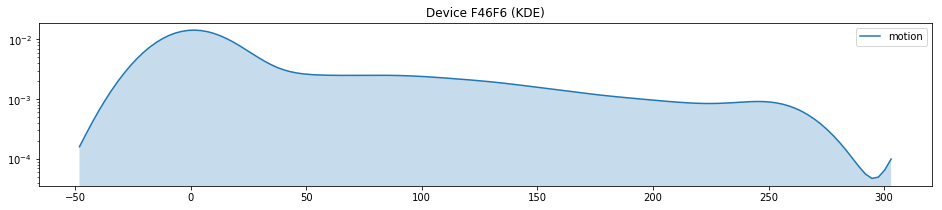

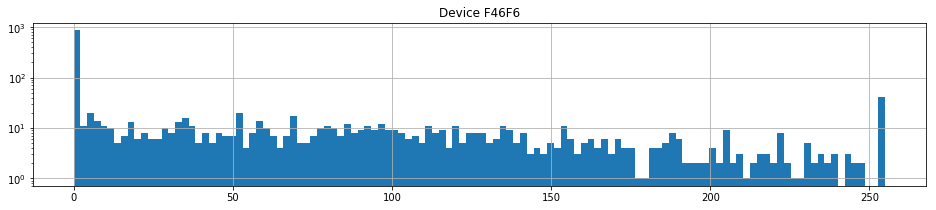

-----------------


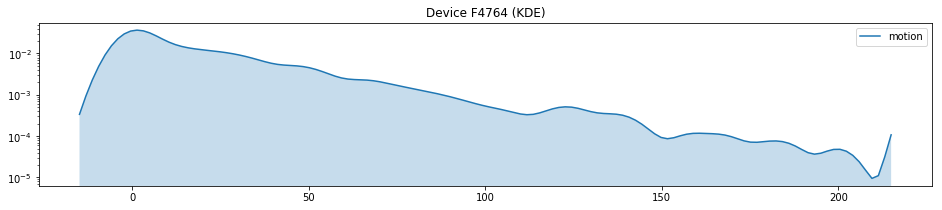

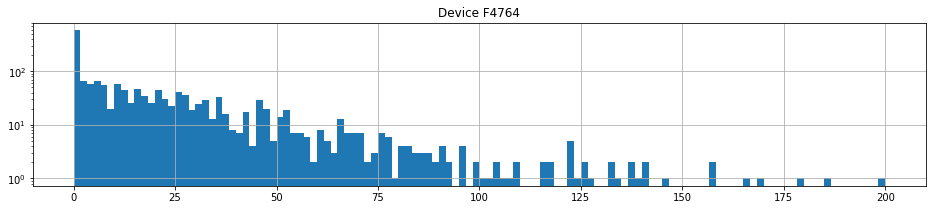

-----------------


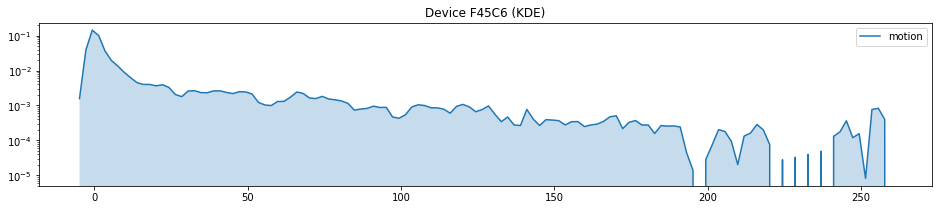

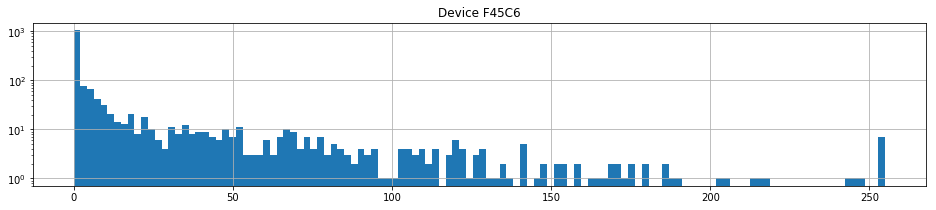

-----------------


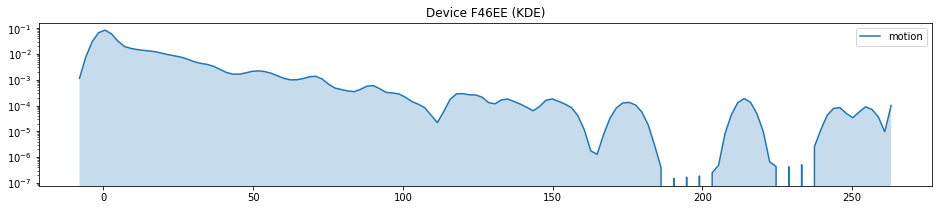

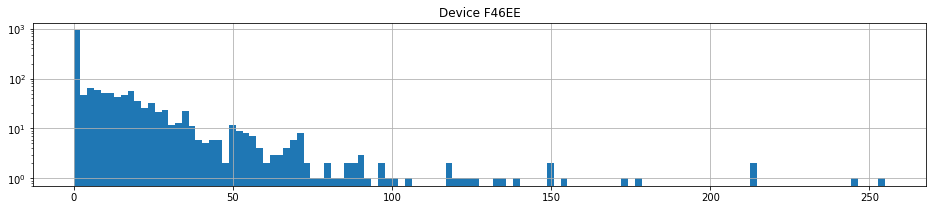

-----------------


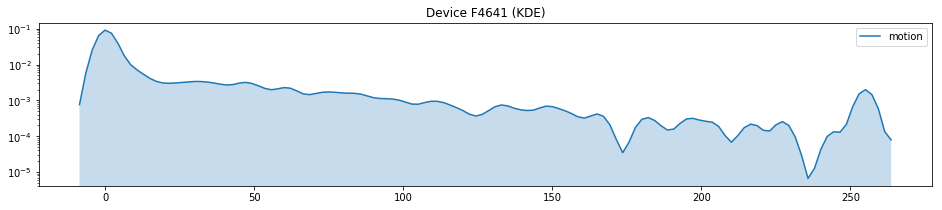

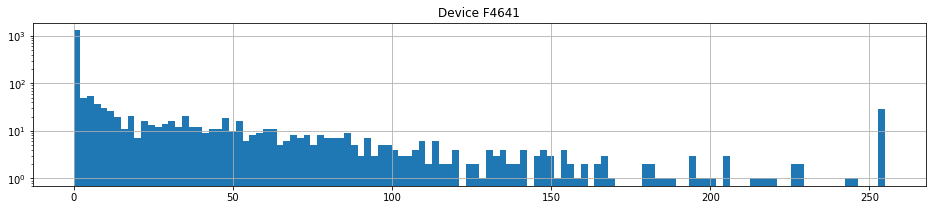

-----------------


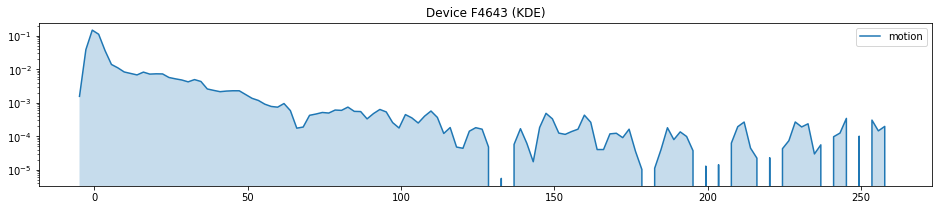

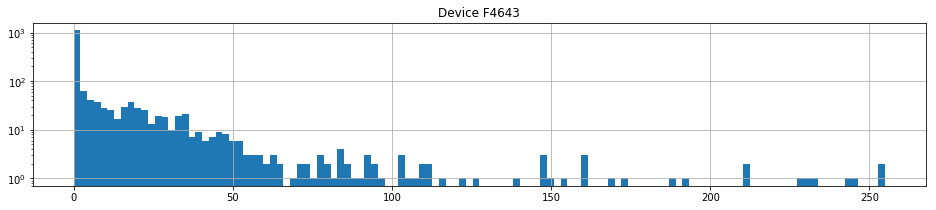

-----------------


In [10]:
plt.figure(figsize=(16,3))
for d in devices:
    plt.figure(figsize=(16,3))
    plt.title ('Device {} (KDE)'.format(d))
    ax=sns.kdeplot(data=df[df.device==d]['motion'], shade=True)
    ax.set_yscale('log') # set scale to log to detect outliers @ 255
    plt.show()
    
    plt.title ('Device {}'.format(d))
    ax=df[df.device==d].motion.hist(bins=120, figsize=(16,3))
    ax.set_yscale('log') # set scale to log to detect outliers @ 255
    plt.show()
    print ('-----------------')

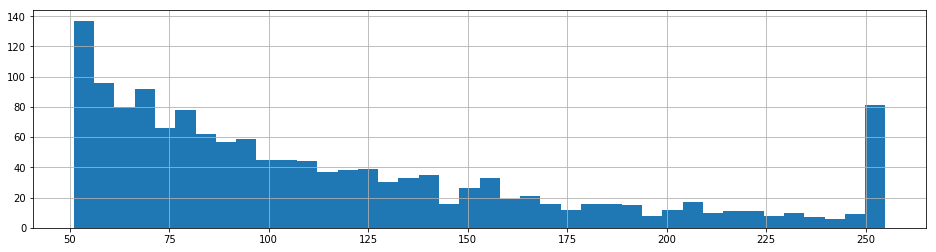

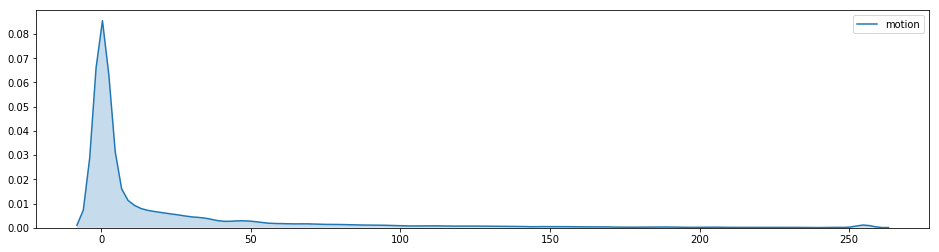

In [11]:
# Possible outlier in motion value 255
df.motion[df.motion>50].hist(bins=40, figsize=(16,4))
plt.show()
plt.figure(figsize=(16,4))
sns.kdeplot(data=df['motion'], shade=True)
plt.show()

In [12]:
# Number of clippings
df[df.motion==255].count()

timestamp    81
device       81
account      81
voltage      81
motion       81
dtype: int64

In [13]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index(['timestamp'], inplace=True)

## Raw data visualization

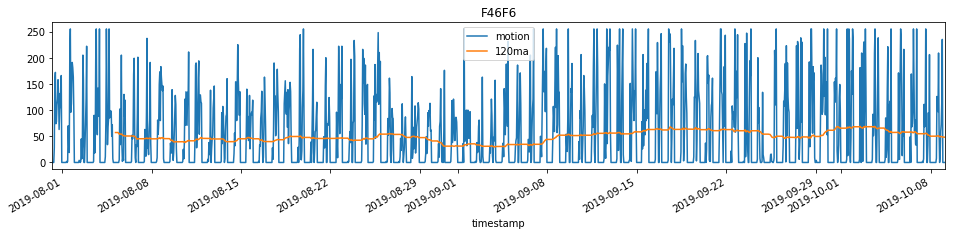

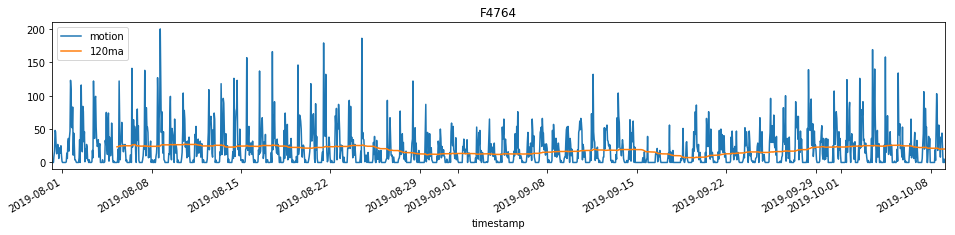

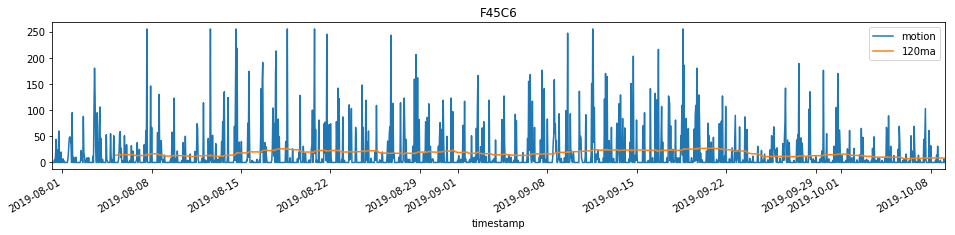

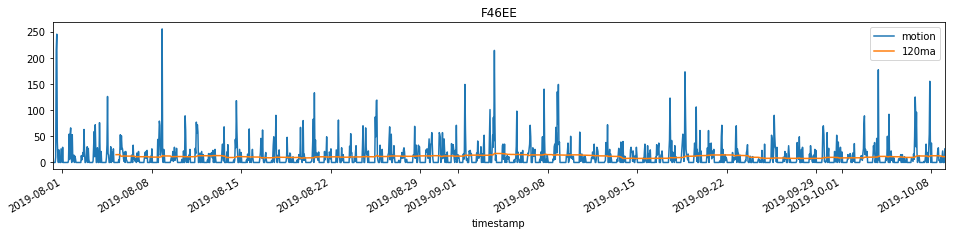

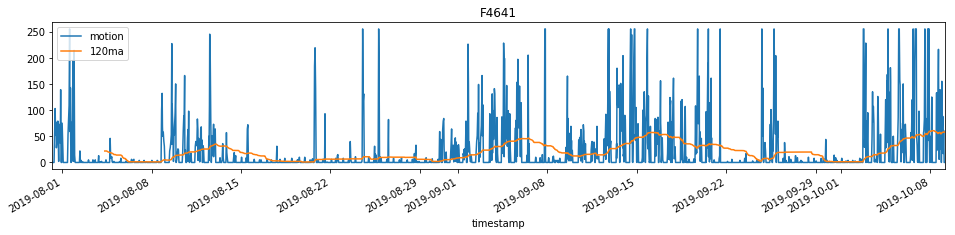

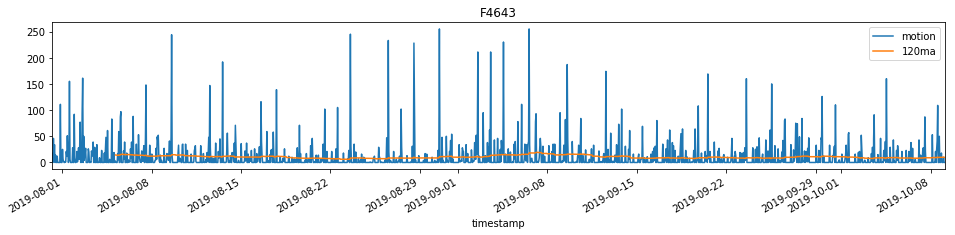

In [14]:
def raw_activity (device):
    data=df[df.device==device]
    data=data.drop(['voltage'], axis=1)
    data['120ma'] = data.motion.rolling(window=120).mean()
    data.plot(figsize=(16,3), title =d)
    plt.show()

for d in devices:
    raw_activity (d)

## Boxplot visualization

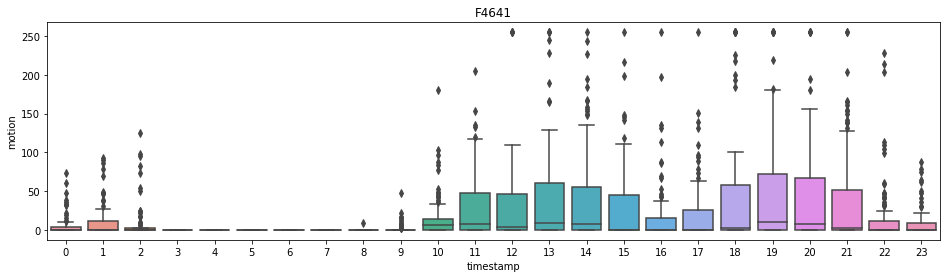

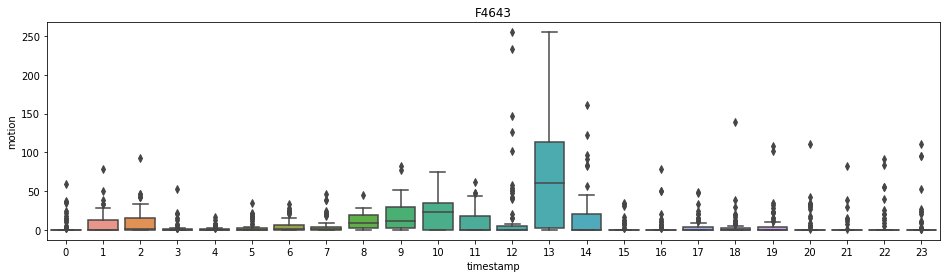

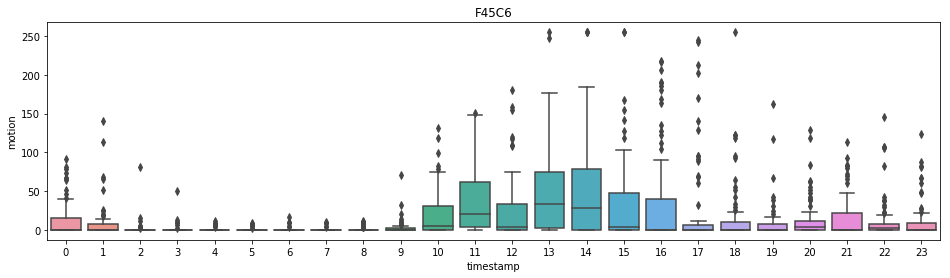

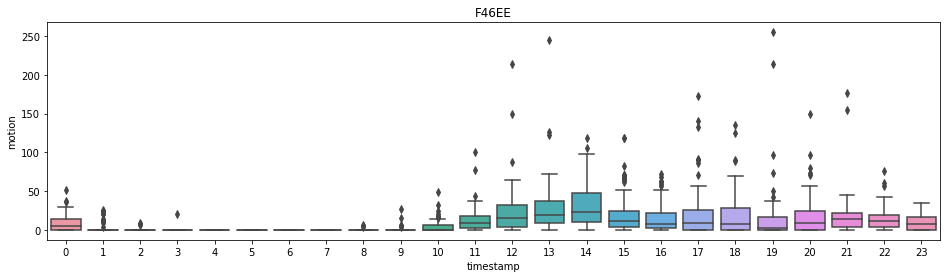

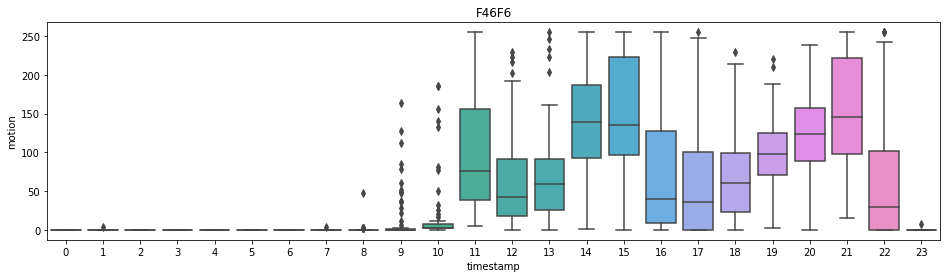

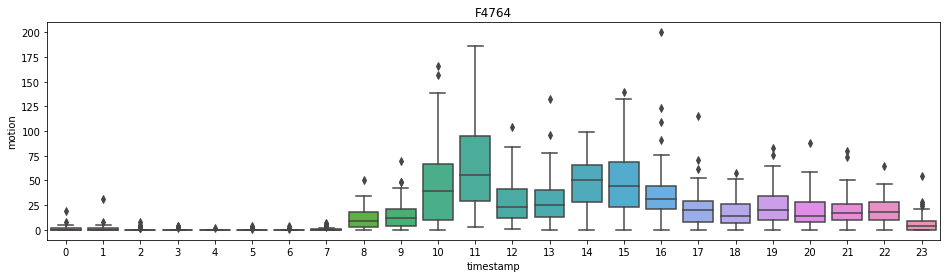

In [15]:
# Boxplot outlier detection

def plot_hourly_activity (dev):
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[df.device==dev].index.hour, y=df[df.device==dev].motion).set_title(dev)
    plt.show()
                                                      
plot_hourly_activity('F4641')
plot_hourly_activity('F4643')
                                                      
plot_hourly_activity('F45C6')
plot_hourly_activity('F46EE')

plot_hourly_activity('F46F6')
plot_hourly_activity('F4764')

# Visual analysis
## Daily activity

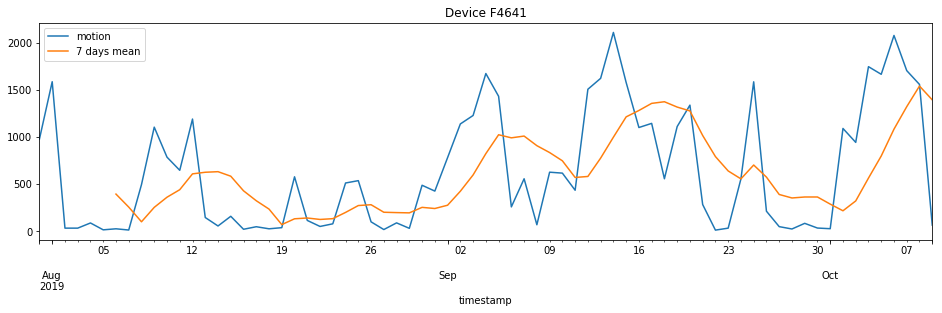

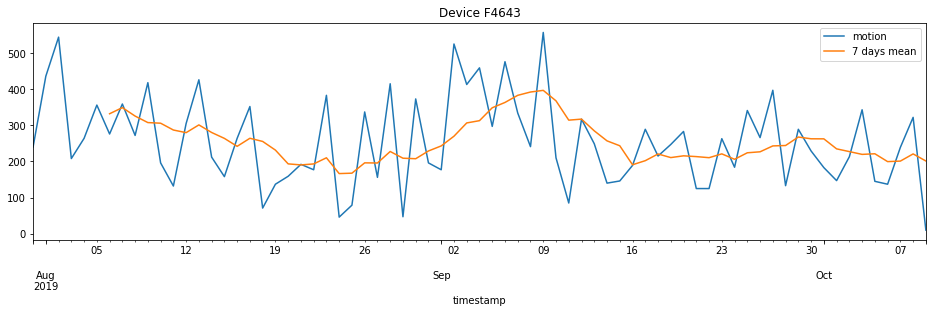

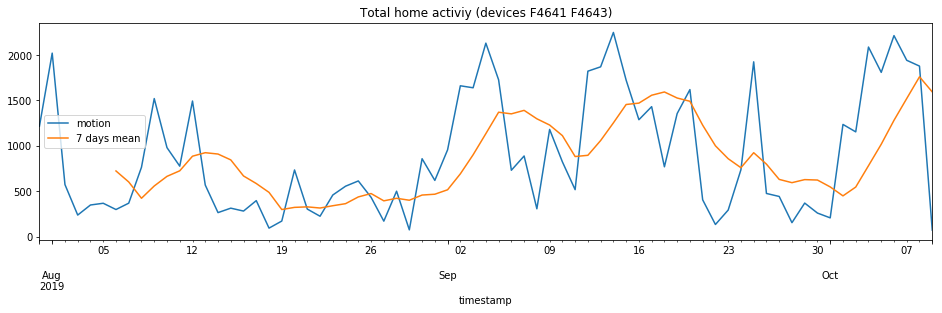

In [16]:
# Daily activity over time
import warnings
warnings.filterwarnings('ignore') # hide timezone warnings


def daily_activity (device):
    data=df[df.device==device].resample('D').sum()
    data=data.drop(['voltage'], axis=1)
    data['7 days mean'] = data.motion.rolling(window=7).mean()
    data.plot(figsize=(16,4),title='Device {}'.format(device))
    plt.show()

def daily_activity_absolute (d1,d2):
    data=df[(df.device==d1) | (df.device==d2)].resample('D').sum()
    data=data.drop(['voltage'], axis=1)
    data['7 days mean'] = data.motion.rolling(window=7).mean()
    data.plot(figsize=(16,4),title='Total home activiy (devices {} {})'.format(d1,d2))
    plt.show()
    
daily_activity ('F4641')
daily_activity ('F4643')
daily_activity_absolute ('F4641','F4643')


## Mean activity by Hour of Day

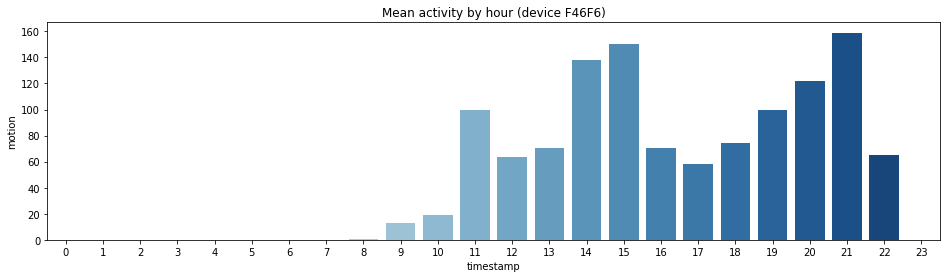

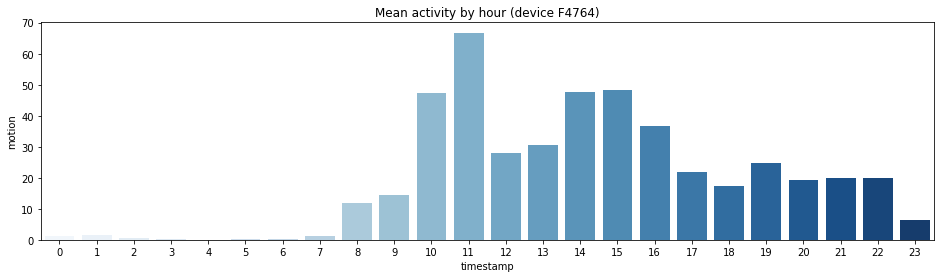

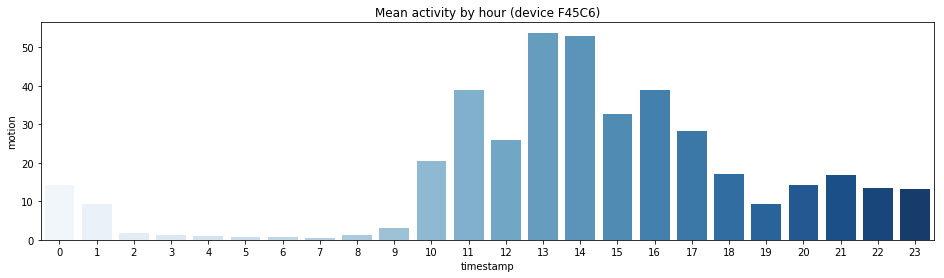

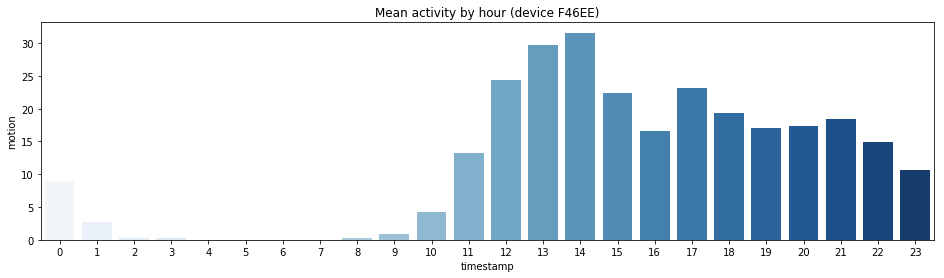

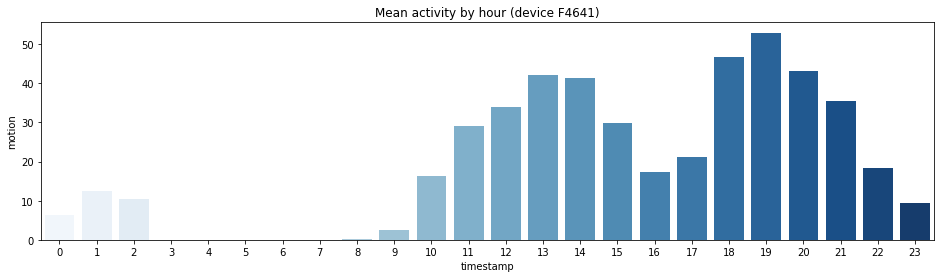

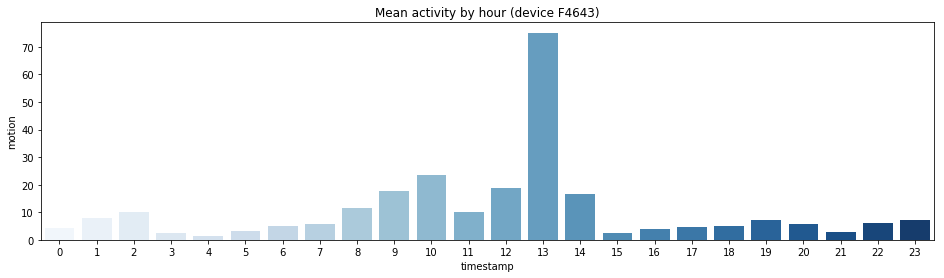

In [17]:
# Mean activity by hour
def plot_hourly_mean(d):
    df2=df[df.device==d].groupby(df[df.device==d].index.hour).mean()
    plt.figure(figsize=(16,4))
    sns.barplot (x=df2.index, y=df2.motion, ci=None, palette='Blues')
    plt.title ('Mean activity by hour (device {})'.format(d))
    plt.show()

for d in devices:
    plot_hourly_mean (d)


## Mean actvity by Day of Week

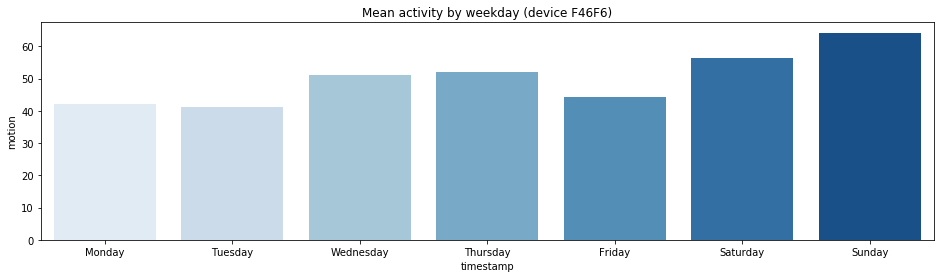

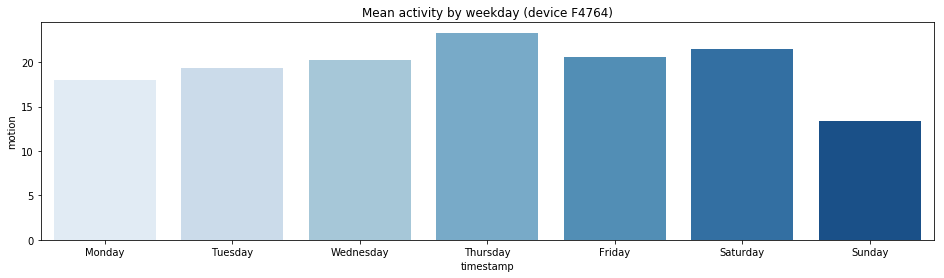

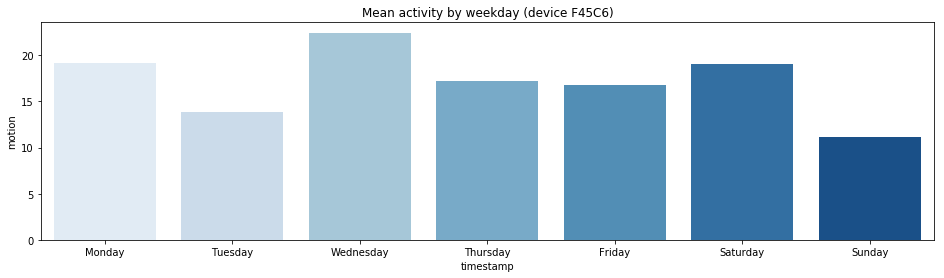

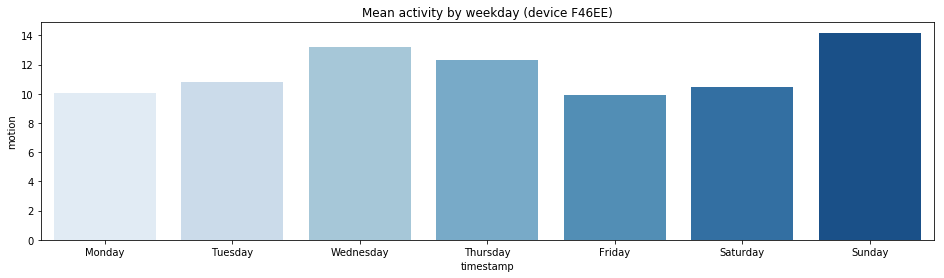

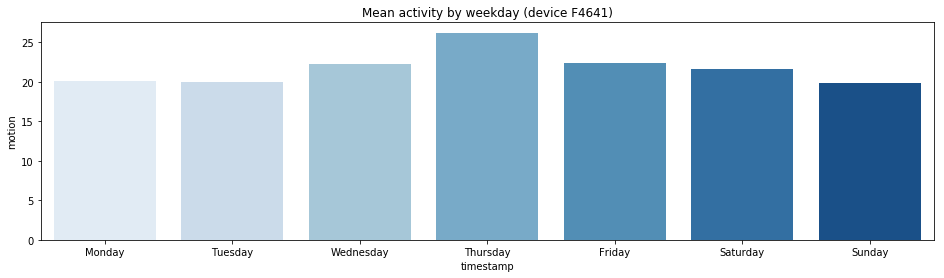

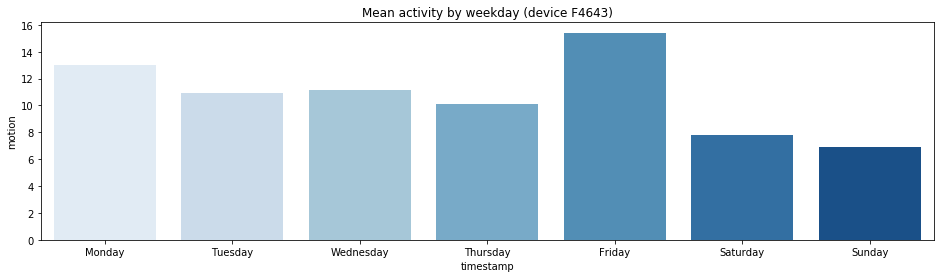

In [18]:
# Mean activity by weekday
def plot_weekday_mean(d):
    df2=df[df.device==d].groupby(df[df.device==d].index.weekday_name).mean()
    df2=df2.reindex (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) #reorder
    plt.figure(figsize=(16,4))
    sns.barplot (x=df2.index, y=df2.motion, ci=None, palette='Blues')
    plt.title ('Mean activity by weekday (device {})'.format(d))
    plt.show()
    
for d in devices:
      plot_weekday_mean(d)

## Heatmap activity by DOW and HOD

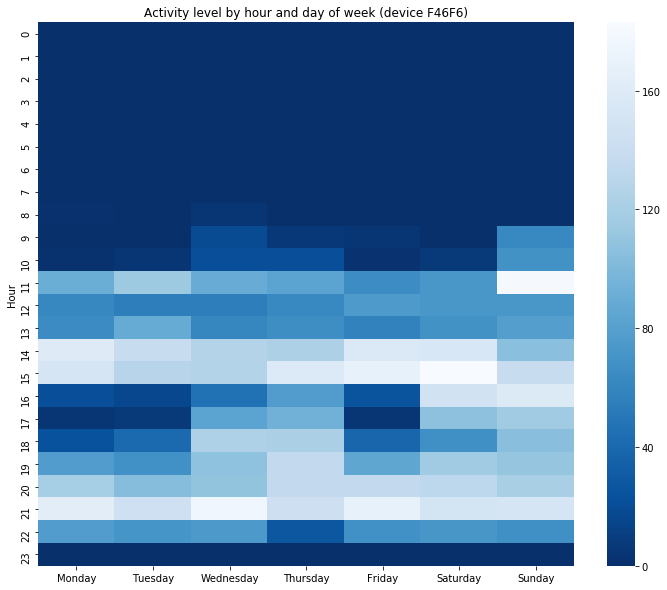

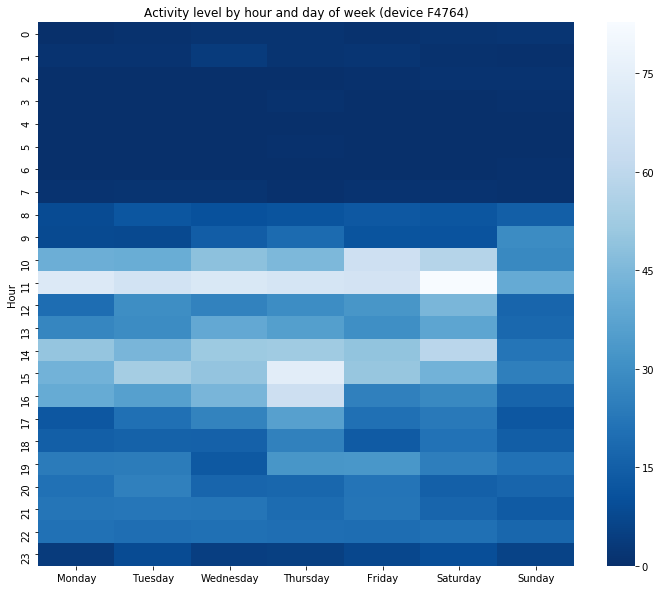

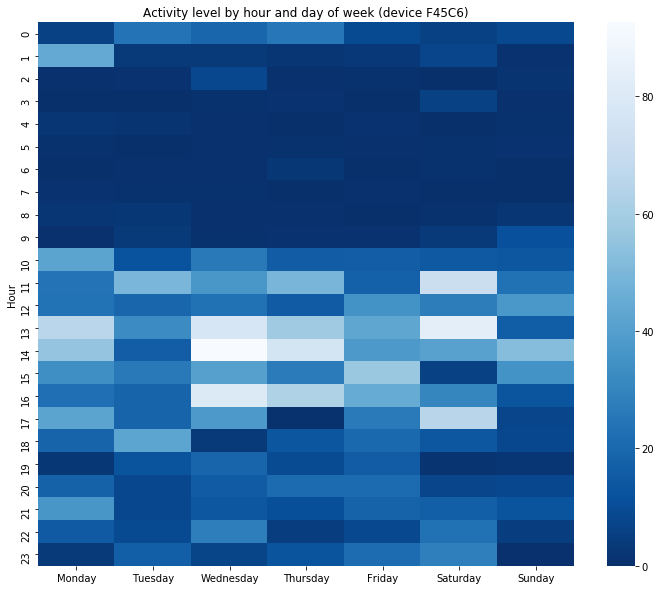

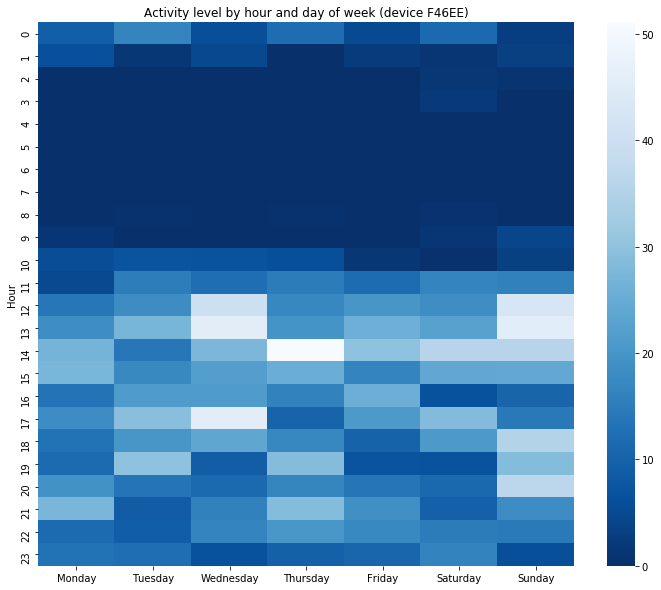

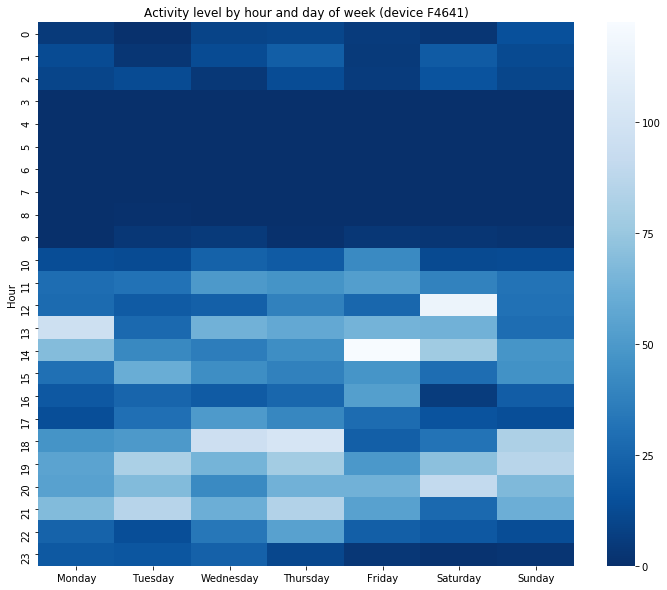

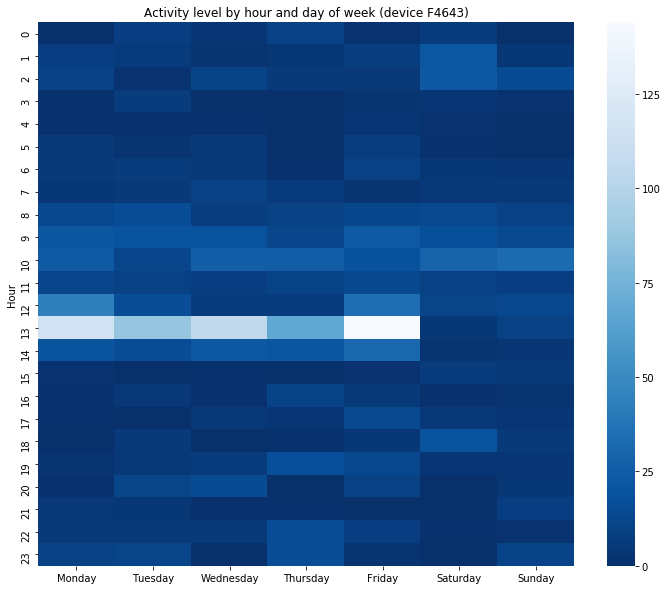

In [19]:
# Heatmap
# Activiy sum or mean by dow and hour

def activity_heatmap (device):
    d = df[df.device==device].resample('H').sum()
    d['dow'] = d.index.weekday_name
    d['hod'] = d.index.hour

    d= d.groupby ([d.index.hour, d.dow]).mean()

    data = d['motion'].unstack()
    data = data[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']] # Reorder columns

    plt.figure(figsize=(12,10))
    sns.heatmap (data=data ,annot=False, cmap="Blues_r")
    plt.title("Activity level by hour and day of week (device {})".format(device))

    plt.ylabel ('Hour')
    plt.xlabel ('')

for d in devices:    
    activity_heatmap (d)


## Comparing homes

### By day of week

In [20]:
# Comparing activity levels between accounts
data = df.drop (['voltage'], axis=1)

#data = data.groupby('account')
data=data.groupby([data.index.weekday_name,'account']).sum()
d=data.motion.unstack()
d

account,dummy_user_1,dummy_user_2,dummy_user_3
timestamp,,,
Friday,15431,6363,10444
Monday,14485,7019,9090
Saturday,18613,7059,8293
Sunday,18533,6063,7533
Thursday,18125,7070,9933
Tuesday,14427,5894,8488
Wednesday,17032,8504,9303


In [21]:
d= d.reset_index()
d

account,timestamp,dummy_user_1,dummy_user_2,dummy_user_3
0,Friday,15431,6363,10444
1,Monday,14485,7019,9090
2,Saturday,18613,7059,8293
3,Sunday,18533,6063,7533
4,Thursday,18125,7070,9933
5,Tuesday,14427,5894,8488
6,Wednesday,17032,8504,9303


In [22]:
d=pd.melt(d, id_vars="timestamp", var_name="user", value_name="activity")
d.head(5)

,timestamp,user,activity
0,Friday,dummy_user_1,15431
1,Monday,dummy_user_1,14485
2,Saturday,dummy_user_1,18613
3,Sunday,dummy_user_1,18533
4,Thursday,dummy_user_1,18125


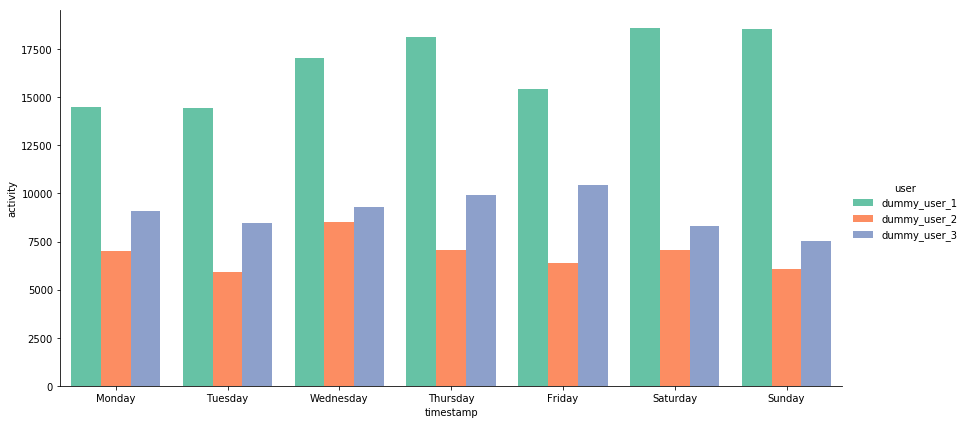

In [23]:
palette = sns.color_palette("mako_r", 3)
palette = sns.color_palette("cubehelix", 3)

palette = sns.color_palette("Set2", 3)

g = sns.catplot(
    x="timestamp", 
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
    y="activity", 
    hue="user",
    data=d, 
    saturation=1,
    alpha=1,
    kind="bar", 
    ci=None,
    palette=palette,
    height=6, # make the plot 5 units high
    aspect=2) # height should be three times width)


### Daily trends



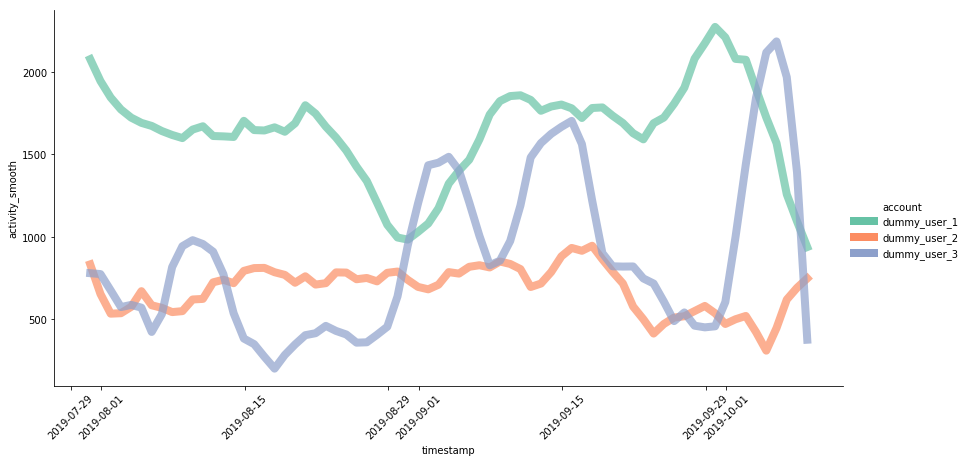

In [24]:
# Home activity comparision
data=df.drop ('voltage', axis=1)
data=data.groupby([data.index,'account']).sum()
data=data.motion.unstack().reset_index()
data=data.set_index('timestamp').resample('D').sum()
data=data.reset_index()
data=pd.melt(data, id_vars="timestamp", var_name="account", value_name="activity")
data['activityma'] = data.activity.rolling(window=14).mean()

from scipy.signal import savgol_filter

data['activity_smooth'] = savgol_filter(data.activity, 13, 3)

sns.set_context(rc={"lines.linewidth": 8}) # line width

fig = sns.relplot(x='timestamp', y='activity_smooth', hue='account',
                palette=palette, 
                kind="line", 
                alpha=0.7,
                data=data,
                height=6,
                aspect=2)

#x_dates = data['timestamp'].dt.strftime('%Y-%m-%d').sort_values().unique()
#fig.set (xticks=x_dates)
fig.set_xticklabels(rotation=45)
plt.show()

In [25]:
data.head(5)

,timestamp,account,activity,activityma,activity_smooth
0,2019-07-31 00:00:00+02:00,dummy_user_1,1916.0,NaN,2075.925824
1,2019-08-01 00:00:00+02:00,dummy_user_1,2273.0,NaN,1943.615385
2,2019-08-02 00:00:00+02:00,dummy_user_1,1532.0,NaN,1843.727772
3,2019-08-03 00:00:00+02:00,dummy_user_1,2031.0,NaN,1771.432567
4,2019-08-04 00:00:00+02:00,dummy_user_1,1928.0,NaN,1721.899351


### Calendar map

In [26]:
# TODO
# calmap package does not provide a way to configure the X axis to show only certain months.
#

import calmap

plt.figure(figsize=(16,10), dpi= 80)
#calmap.calendarplot(data[data.account=='dummy_user_1']['activity'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
#plt.show()
d=data.set_index('timestamp')
d=d[d.account=='dummy_user_1']

ModuleNotFoundError: No module named 'calmap'

In [27]:
import pandas as pd

import numpy as np

import calmap # pip install calmap

d = data[['timestamp','activity']]
d = d.set_index('timestamp')
#d.activity = np.random.randn (d.shape[0],1)

d.index=d.index.strftime ('%Y-%m-%d')
d.index=pd.DatetimeIndex (d.index)

fig,ax=calmap.calendarplot(d['activity'],
                    linewidth=0,cmap='YlGn',
                    fig_kws=dict(figsize=(16,8)))

#fig.suptitle('Calendar view' ,fontsize=20,y=1.08)

ModuleNotFoundError: No module named 'calmap'

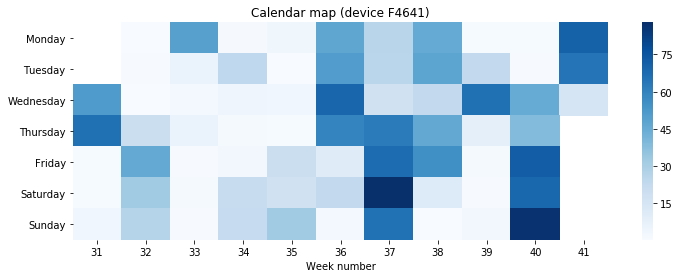

In [28]:
# My calendar heatmap
def activity_heatmap (d,device):
    #d.timestamp = pd.to_datetime(d.timestamp)
    #d=d.set_index(['timestamp'])
    
    
    d = d[d.device==device].resample('H').sum()
    d['dow'] = d.index.weekday_name
    d['woy'] = d.index.weekofyear

    d= d.groupby ([d.dow,d.woy]).mean()

    data = d['motion'].unstack()
    data = data.T[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']] # Reorder columns
    #print(data.T)
    plt.figure(figsize=(12,4))
    sns.heatmap (data=data.T ,annot=False, cmap="Blues")
    plt.title("Calendar map (device {})".format(device))

    plt.ylabel ('')
    plt.xlabel ('Week number')


activity_heatmap (df, 'F4641')